In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = '/cosma5/data/dp004/hvrn44/HOD/'

In [3]:
halo_mass_cut = 1.e11 #solar masses

In [4]:
def plot_halo_mass_function(mass):
    nbins= 20
    bins = np.logspace(11,
                       np.log10(np.max(mass)), nbins+1)

    bin_centers = (bins[1:]+bins[:-1])/2.

    mass_func, edges = np.histogram(mass, bins=bins)
    plt.loglog((edges[1:]+edges[:-1])/2.,
               mass_func,color='black', marker='o',markersize=3)

    plt.ylabel('Number of halos')
    plt.xlabel(r'$M_{200c}$')


## Halo matching

In [5]:
matching_df = pd.read_csv(data_path + 'MatchedHaloes_L205n2500.dat',
                         delimiter = ' ', skiprows = 1,
        names = ['ID_DMO', 'ID_HYDRO', 'M200_DMO', 'M200_HYDRO'])

In [6]:
matching_df

,ID_DMO,ID_HYDRO,M200_DMO,M200_HYDRO
0,0,0,1.021000e+15,1.040000e+15
1,1,1,8.764000e+14,8.856000e+14
2,2,2,6.446000e+14,7.000000e+14
3,3,3,5.923000e+14,6.094000e+14
4,4,4,5.618000e+14,5.702000e+14
...,...,...,...,...
507535,233452,17621455,1.074000e+11,1.121000e+09
507536,64861,17622524,4.568000e+11,4.780000e+08
507537,106353,17622884,2.592000e+11,7.641000e+08
507538,39555,17623990,6.809000e+11,6.064000e+08


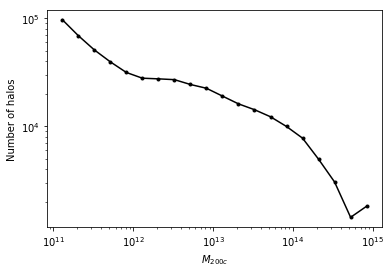

In [9]:
plot_halo_mass_function(matching_df['M200_DMO'])


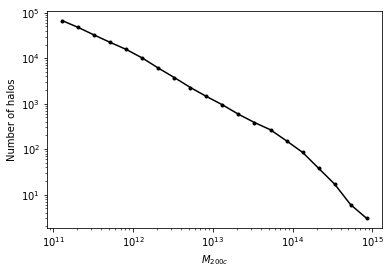

In [10]:
plot_halo_mass_function(matching_df['M200_HYDRO'])

In [11]:
print(f'There are {len(np.unique(matching_df.ID_DMO))} unique haloes in the Dark matter only simulation')

There are 228051 unique haloes in the Dark matter only simulation


In [12]:
print(f'There are {len(np.unique(matching_df.ID_HYDRO))} haloes in the hydro simulation')

There are 507540 haloes in the hydro simulation


## Halo mass cut on the hydro ones

In [13]:
mass_matching_df = matching_df.loc[matching_df['M200_HYDRO'] > halo_mass_cut]

In [14]:
print(f'There are {len(np.unique(mass_matching_df.ID_DMO))} unique haloes above {halo_mass_cut:.1E}'
      ' solar masses in the Dark matter only simulation')

There are 207006 unique haloes above 1.0E+11 solar masses in the Dark matter only simulation


In [15]:
print(f'There are {len(np.unique(mass_matching_df.ID_HYDRO))} unique haloes above {halo_mass_cut:.1E}'
      ' solar masses in the Hydro simulation')

There are 211124 unique haloes above 1.0E+11 solar masses in the Hydro simulation


In [16]:
idx, count = np.unique(mass_matching_df.ID_DMO, return_counts=True)

In [17]:
mass_matching_df.loc[mass_matching_df.ID_DMO == 0]

,ID_DMO,ID_HYDRO,M200_DMO,M200_HYDRO
0,0,0,1.021000e+15,1.040000e+15
30,0,30,1.021000e+15,2.637000e+14
239,0,239,1.021000e+15,7.667000e+13
2607,0,2607,1.021000e+15,8.674000e+12
13023,0,13037,1.021000e+15,2.638000e+12
23841,0,23864,1.021000e+15,5.811000e+11
26114,0,26140,1.021000e+15,1.468000e+12
29699,0,29727,1.021000e+15,8.875000e+11
45926,0,45963,1.021000e+15,3.909000e+11
63827,0,63874,1.021000e+15,3.320000e+11


Text(0.5,0,'Number of hydro haloes matched to the same DMO halo')

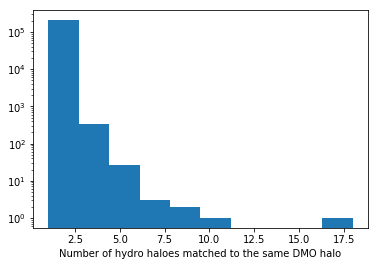

In [20]:
plt.hist(count, log = True)
plt.xlabel('Number of hydro haloes matched to the same DMO halo')

## Halo properties

In [21]:
with h5py.File(data_path + 'HaloProfiles_DMO_z0.00_ext.hdf5', 'r') as hf:
        
    print(list(hf['Haloes'].keys()))
    
    #for key in hf['Haloes'].keys():

        #print('Shape : ', hf['Haloes'][key].shape)
    
    mass = hf['Haloes']['HaloMassDM'][:]
    cnfw = hf['Haloes']['Cnfw'][:]
    properties_ids = hf['Haloes']['GroupNumber'][:]

['BetaDM', 'BetaTot', 'Cnfw', 'CoP', 'DMDenProfile', 'DMMassProfile', 'DMVelProfile', 'GammaDM', 'GammaTot', 'GasDenProfile', 'GasMassProfile', 'GasVelProfile', 'GroupNumber', 'HaloMassDM', 'HaloMassGas', 'HaloMassStar', 'HaloMassTot', 'LessRR200', 'LessRadius', 'LessTexp', 'M200', 'Nsubs', 'NumPartsBH', 'NumPartsDM', 'NumPartsGas', 'NumPartsStar', 'PLIndex', 'R200', 'RR200', 'R_Conv', 'Radius', 'Rhosnfw', 'Rmax', 'Spin', 'StarDenProfile', 'StarMassProfile', 'StarVelProfile', 'SubCumSFH', 'SubSFR', 'Texp', 'TotDenProfile', 'TotMassProfile', 'TotVelProfile', 'Vmax', 'doff', 'fsub']


In [22]:
len(mass)

229265

In [23]:
len(np.where(mass > 1.e11)[0])

229265

Text(0.5,0,'$c_{NFW}$')

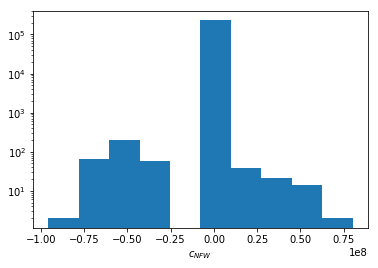

In [24]:
plt.hist(cnfw, log = True)
plt.xlabel('$c_{NFW}$')

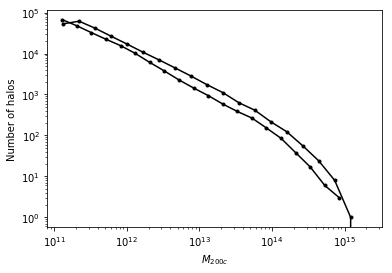

In [26]:
plot_halo_mass_function(matching_df['M200_HYDRO'])
plot_halo_mass_function(mass)

In [27]:
properties_df = pd.DataFrame(data = properties_ids, columns = ['ID_DMO'])

In [28]:
properties_df

,ID_DMO
0,0
1,1
2,2
3,3
4,4
...,...
229260,278079
229261,278541
229262,279423
229263,279745


## Merger Tree

In [30]:
 
with h5py.File(data_path + 'MergerTree_L205n2500TNG_DM_ext_New.hdf5',
               'r') as hf:
    print(list(hf.keys()))
    print(list(hf['Haloes'].keys()))
    
    formation_time = hf['Haloes']['z0p50'][:]
    
    mergertree_ids = hf['Haloes']['Index'][:]


['Haloes']
['Index', 'MainProgMass', 'Mhist', 'Mpeak', 'NMerg', 'Redshifts', 'Vpeak', 'z0p25', 'z0p50', 'z0p75']


In [31]:
formation_time.shape

(324884,)

In [32]:
mergertree_df = pd.DataFrame(data = mergertree_ids, columns = ['ID_DMO'])

In [33]:
common_ids = pd.merge(mass_matching_df, mergertree_df, on = ['ID_DMO'], how = 'inner')

In [34]:
len(np.unique(common_ids['ID_DMO']))

207006

In [35]:
common_ids = pd.merge(mass_matching_df, properties_df, on = ['ID_DMO'], how = 'inner')

In [36]:
len(np.unique(common_ids['ID_DMO']))

207006

In [37]:
len(matching_df)

507540